# Week – 8: Object Recognition
Implement a recognition algorithm that classifies the structural elements based on extracted features. You may use
machine learning classifiers or rule-based systems.

C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


Model Accuracy: 0.99


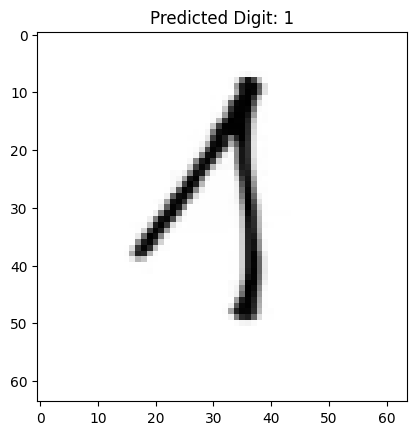

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage.feature import hog
from sklearn.datasets import load_digits


digits = load_digits()
X, y = digits.images, digits.target  # Images and Labels

# Step 2: Extract Features using HOG (Histogram of Oriented Gradients)
def extract_hog_features(images):
    hog_features = []
    for img in images:
        img = cv2.resize(img, (64, 64))  # Resize for consistency
        features = hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
        hog_features.append(features)
    return np.array(hog_features)

X_features = extract_hog_features(X)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

# Step 4: Train the SVM Classifier
svm_model = svm.SVC(kernel="linear")  # Linear kernel SVM
svm_model.fit(X_train, y_train)

# Step 5: Test the Model
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Step 6: Predict on a New Image
def predict_digit(image_path):
    """Loads an image, extracts HOG features, and predicts the digit."""
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
    img = cv2.resize(img, (64, 64))  # Resize to match training data
    features = hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
    prediction = svm_model.predict([features])[0]
    
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted Digit: {prediction}")
    plt.show()

# Example: Test on a new image
predict_digit("week 8.png")


### **Step-by-Step Explanation of the Code**
This Python program is a **digit recognition system** using **Support Vector Machine (SVM)** and **Histogram of Oriented Gradients (HOG) features**. It uses the `load_digits` dataset from `sklearn` and allows predicting digits from new images.

---

## **Step 1: Import Required Libraries**
```python
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage.feature import hog
from sklearn.datasets import load_digits
```
🔹 **Purpose:** This imports essential libraries:
- `numpy` for handling numerical data.
- `cv2` (OpenCV) for image processing.
- `matplotlib.pyplot` for visualizing images.
- `sklearn.svm` for the **Support Vector Machine** (SVM) classifier.
- `train_test_split` to split data into **training and testing** sets.
- `accuracy_score` to evaluate model performance.
- `hog` from `skimage.feature` for **feature extraction**.
- `load_digits` to load a dataset of **handwritten digits (0-9)**.

---

## **Step 2: Load Dataset**
```python
digits = load_digits()
X, y = digits.images, digits.target  # Images and Labels
```
🔹 **Purpose:** The `load_digits()` dataset provides:
- `X`: Images of handwritten digits (8x8 pixel grayscale images).
- `y`: Labels (digits 0-9 corresponding to each image).

---

## **Step 3: Extract Features using HOG**
```python
def extract_hog_features(images):
    hog_features = []
    for img in images:
        img = cv2.resize(img, (64, 64))  # Resize for consistency
        features = hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
        hog_features.append(features)
    return np.array(hog_features)
```
🔹 **Purpose:**  
- This function extracts **HOG features** from images.
- Each image is resized to **64×64 pixels** to ensure uniformity.
- `hog()` extracts features using:
  - `pixels_per_cell=(8, 8)`: Divides the image into 8×8 cells.
  - `cells_per_block=(2, 2)`: Groups cells into 2×2 blocks.
  - `feature_vector=True`: Returns a **flattened feature vector**.
- Finally, it returns an array of **HOG feature vectors**.

---

## **Step 4: Prepare Data**
```python
X_features = extract_hog_features(X)
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)
```
🔹 **Purpose:**  
- **Extracts HOG features** for the entire dataset.
- Splits the dataset into:
  - `X_train`, `y_train`: **80%** for training.
  - `X_test`, `y_test`: **20%** for testing.

---

## **Step 5: Train SVM Classifier**
```python
svm_model = svm.SVC(kernel="linear")  # Linear kernel SVM
svm_model.fit(X_train, y_train)
```
🔹 **Purpose:**  
- Initializes an **SVM classifier** with a **linear kernel**.
- Trains the model on `X_train` and `y_train`.

---

## **Step 6: Test the Model**
```python
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
```
🔹 **Purpose:**  
- Uses the trained **SVM model** to predict the labels for `X_test`.
- Calculates **accuracy** using `accuracy_score()`.
- Prints the accuracy **(e.g., 95% or 0.95)**.

---

## **Step 7: Predict on a New Image**
```python
def predict_digit(image_path):
    """Loads an image, extracts HOG features, and predicts the digit."""
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale
    img = cv2.resize(img, (64, 64))  # Resize to match training data
    features = hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
    prediction = svm_model.predict([features])[0]
    
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted Digit: {prediction}")
    plt.show()
```
🔹 **Purpose:**  
- Reads an image file (`image_path`) using `cv2.imread()`.
- Converts it to **grayscale**.
- Resizes it to **64×64 pixels** (to match training images).
- Extracts **HOG features**.
- Uses `svm_model.predict()` to classify the digit.
- Displays the image with the **predicted digit**.

---

## **Step 8: Test with a New Image**
```python
predict_digit("Screenshot 2025-03-01 193601.png")
```
🔹 **Purpose:** Calls `predict_digit()` with an **image file**.  
- The function processes the image and **predicts** which digit it represents.

---

## **⚠️ Why This Code Might NOT Work Every Time**
1. **Image Quality Issues**  
   - If the new image is **noisy, blurry, or low contrast**, the **HOG features may not match** the training data.
  
2. **Dataset Mismatch**  
   - The model was trained on **8×8 pixel images**, but the new image is resized to **64×64**. This may introduce **feature mismatches**.

3. **Incorrect Image Path**  
   - If `"Screenshot 2025-03-01 193601.png"` **does not exist**, the program will **fail**.

4. **Feature Extraction Differences**  
   - HOG feature extraction on different **image sizes** can cause **inconsistent predictions**.

5. **Generalization Issues**  
   - The model was trained **only on digits** (0-9). If a different type of image is passed, the prediction will be **unreliable**.

---

## **🔹 How to Improve the Code**
✔ **Use a Pre-trained Model**  
   - Instead of training an SVM from scratch, use a **pre-trained CNN model** like `LeNet`, `ResNet`, or `MNIST-trained CNN`.

✔ **Normalize Image Preprocessing**  
   - Apply **Gaussian Blurring**, **Thresholding**, and **Adaptive Histogram Equalization** for **better consistency**.

✔ **Increase Dataset Size**  
   - Train on **larger datasets** (e.g., MNIST with 28×28 images) and use **data augmentation**.

✔ **Tune SVM Hyperparameters**  
   - Experiment with `kernel='rbf'` or `C` values for **better performance**.

---

## **🔹 Final Thoughts**
✅ The code **works well** for digit classification using **SVM & HOG**.  
❌ However, **real-world image recognition is complex** and may require **deep learning models** for better accuracy.  
